In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [30]:

file_path = "https://raw.githubusercontent.com/juankquintana/aprendizaje-no-supervisado/main/Proyecto/data/movies_metadata.csv"

metadata = pd.read_csv(file_path)

metadata.head(5)

<ipython-input-30-ec0f761ae13f>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(file_path)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [31]:
metadata['genres_length'] = metadata['genres'].apply(lambda x: len(x) if isinstance(x, list) else None)

# Mostrar las primeras filas para verificar
print(metadata[['genres', 'genres_length']].head())

                                              genres genres_length
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...          None
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...          None
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...          None
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...          None
4                     [{'id': 35, 'name': 'Comedy'}]          None


In [32]:
print(metadata['belongs_to_collection'].apply(type).head())

0      <class 'str'>
1    <class 'float'>
2      <class 'str'>
3    <class 'float'>
4      <class 'str'>
Name: belongs_to_collection, dtype: object


In [33]:
metadata['belongs_to_collection'].head()

,belongs_to_collection
0,"{'id': 10194, 'name': 'Toy Story Collection', ..."
1,NaN
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect..."
3,NaN
4,"{'id': 96871, 'name': 'Father of the Bride Col..."


In [34]:
import ast

metadata['genres_p'] = metadata['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
metadata['genre_names'] = metadata['genres_p'].apply(lambda x: [genre_p['name'] for genre_p in x] if isinstance(x, list) else [])

metadata['genre_names']

,genre_names
0,"[Animation, Comedy, Family]"
1,"[Adventure, Fantasy, Family]"
2,"[Romance, Comedy]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]
...,...
45461,"[Drama, Family]"
45462,[Drama]
45463,"[Action, Drama, Thriller]"
45464,[]


<ipython-input-41-404992400996>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='movie_count', y='genre_name', data=top_25_genres, palette='viridis')


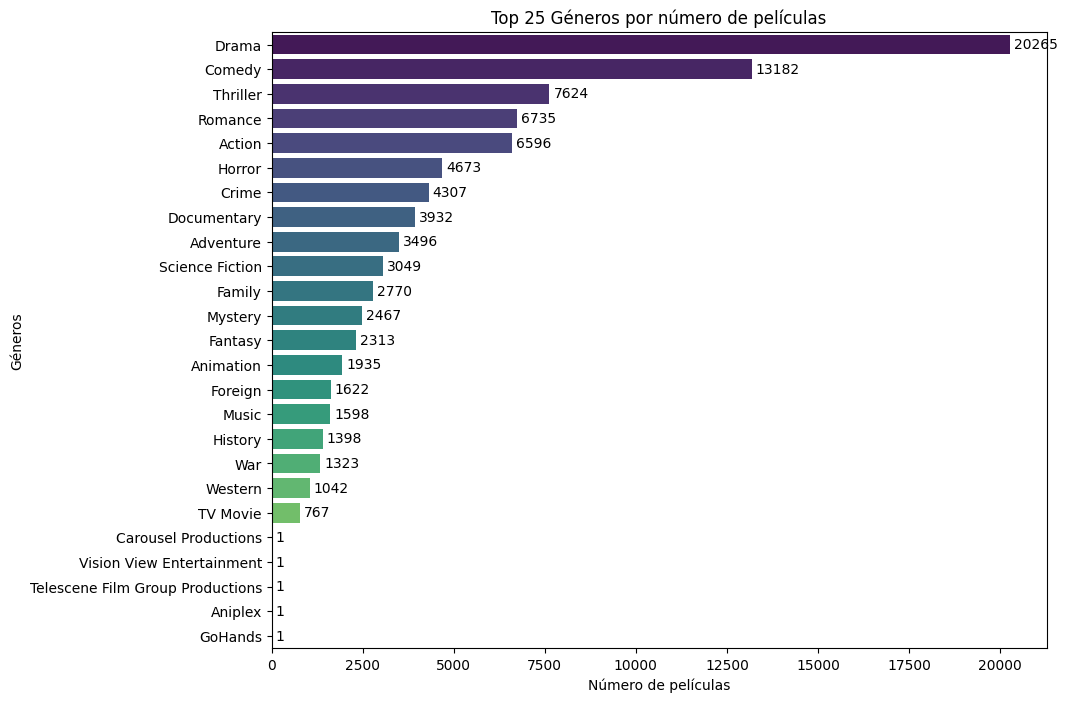

In [41]:
metadata_exploded = metadata.explode('genre_names')

# Luego, contar cuántas veces aparece cada género
genre_counts = metadata_exploded['genre_names'].value_counts().reset_index()
genre_counts.columns = ['genre_name', 'movie_count']

# Seleccionar solo el top 25 géneros
top_25_genres = genre_counts.head(25)

# Graficar los datos
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='movie_count', y='genre_name', data=top_25_genres, palette='viridis')

# Agregar etiquetas de datos
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.xlabel('Número de películas')
plt.ylabel('Géneros')
plt.title('Top 25 Géneros por número de películas')
plt.show()

In [36]:
metadata['belongs_to_collection_p'] = metadata['belongs_to_collection'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extraer el nombre de la colección, si la columna contiene una lista de diccionarios
metadata['collection'] = metadata['belongs_to_collection_p'].apply(
    lambda x: x[0]['name'] if isinstance(x, list) and len(x) > 0 and 'name' in x[0] else None)
metadata['collection']

,collection
0,None
1,None
2,None
3,None
4,None
...,...
45461,None
45462,None
45463,None
45464,None


In [22]:
metadata[metadata['video']==True].iloc[:5,:]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,genres_length,genres_p,genre_names,belongs_to_collection_p,collection
5492,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,15173,tt0298388,en,Jonah: A VeggieTales Movie,"Get ready as Bob the Tomato, Larry the Cucumbe...",...,Fresh Fish. Mixed Vegetables.,Jonah: A VeggieTales Movie,True,6.4,22.0,None,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[Action, Adventure, Animation, Comedy, Family,...",NaN,None
11469,False,"{'id': 123438, 'name': 'Loose Change Collectio...",5000,"[{'id': 99, 'name': 'Documentary'}]",http://www.loosechange911.com/,14277,tt0831315,en,Loose Change: 2nd Edition,What if...September 11th was not a surprise at...,...,What really happened on 9/11?,Loose Change: 2nd Edition,True,6.3,16.0,None,"[{'id': 99, 'name': 'Documentary'}]",[Documentary],"{'id': 123438, 'name': 'Loose Change Collectio...",None
13564,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,284117,tt1198399,en,Fitna,A short film in which Quran verses are shown a...,...,NaN,Fitna,True,1.0,1.0,None,"[{'id': 99, 'name': 'Documentary'}]",[Documentary],NaN,None
14271,False,"{'id': 190135, 'name': 'Love Hina Collection',...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,44685,tt0416938,ja,ラブひな 春スペシャル ～キミサクラチルナカレ!!～,"The tests have come, and Keitaro can only hope...",...,Spring break... Love Hina Style!!,Love Hina Spring Special - I Wish Your Dream,True,4.7,3.0,None,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[Comedy, Romance, Animation, Music]","{'id': 190135, 'name': 'Love Hina Collection',...",None
14608,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/familyzone/playmobil/,35148,tt1512792,en,Playmobil: The Secret of Pirate Island,"Ahoy, matey! Your Favorite Playmobil toys have...",...,NaN,Playmobil: The Secret of Pirate Island,True,0.0,0.0,None,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[Action, Adventure, Family, Fantasy]",NaN,None


In [23]:
file_path_keywords = "https://raw.githubusercontent.com/juankquintana/aprendizaje-no-supervisado/main/Proyecto/data/keywords.csv"

df_keywords = pd.read_csv(file_path_keywords)

df_keywords.head(5)


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [24]:
import ast

# Convertir la columna 'keywords' de string a una lista de diccionarios
df_keywords['keywords'] = df_keywords['keywords'].apply(ast.literal_eval)
df_keywords_exploded = df_keywords.explode('keywords')

df_keywords_exploded['keyword_id'] = df_keywords_exploded['keywords'].apply(lambda x: x['id'] if isinstance(x, dict) else None)
df_keywords_exploded['keyword_name'] = df_keywords_exploded['keywords'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

# Eliminar la columna original 'keywords'
df_keywords_exploded = df_keywords_exploded.drop(columns=['keywords'])

print(df_keywords_exploded.head(20))

      id  keyword_id              keyword_name
0    862       931.0                  jealousy
0    862      4290.0                       toy
0    862      5202.0                       boy
0    862      6054.0                friendship
0    862      9713.0                   friends
0    862      9823.0                   rivalry
0    862    165503.0             boy next door
0    862    170722.0                   new toy
0    862    187065.0         toy comes to life
1   8844     10090.0                board game
1   8844     10941.0             disappearance
1   8844     15101.0  based on children's book
1   8844     33467.0                  new home
1   8844    158086.0                   recluse
1   8844    158091.0              giant insect
2  15602      1495.0                   fishing
2  15602     12392.0               best friend
2  15602    179431.0      duringcreditsstinger
2  15602    208510.0                   old men
3  31357       818.0            based on novel


<ipython-input-27-f449e32977b8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='movie_count', y='keyword_name', data=top_25_keywords, palette='viridis')


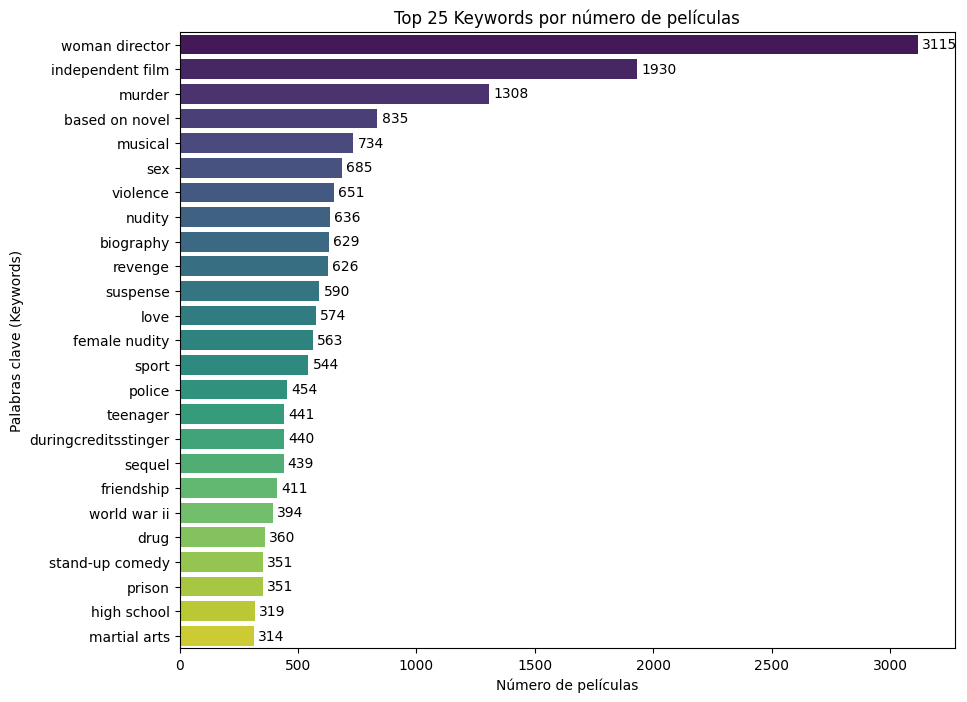

In [27]:
keyword_counts = df_keywords_exploded.groupby('keyword_name')['id'].count().reset_index(name='movie_count')

# Ordenar los datos por el número de películas para una mejor visualización
keyword_counts = keyword_counts.sort_values('movie_count', ascending=False)

top_25_keywords = keyword_counts.head(25)

# Graficar los datos
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='movie_count', y='keyword_name', data=top_25_keywords, palette='viridis')

# Agregar etiquetas de datos
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=3)

plt.xlabel('Número de películas')
plt.ylabel('Palabras clave (Keywords)')
plt.title('Top 25 Keywords por número de películas')
plt.show()